Optical properties of responsive hybrid Au@polymer nanoparticles
========

Must change title eventually

Supporting information - data analysis: import & initial plots
--------

Abstract
--------

We take a close look at the physical and optical properties of Au@PNIPAM core-shell nanoparticles.
- Small Au cores, radius $\sim$ 8.5 nm
- Wide range of shell thickness, 15 to 200 nm
- Two shell architectures: 
    - grafted/linear, thin range: [16, 65] nm
    - seeded-precipitation/cross-linked, thick range: [50, 193] nm
- Studied with UV-vis, DLS, SLS, TEM

# 1. Initialize analysis

## 1.1 Initialize computational/python framework

In [1]:
%run header

Loading import modules ...
  ... math, cmath (local)
  ... os, sys, types, importlib
  ... time, datetime
  ... ipyparallel as ipp
  ... numpy as np
  ... scipy as sp
      scipy.special (local, for Bessel functions)
      scipy.interpolate as interpolate
      scipy.signal as signal
  ... matplotlib
      matplotlib.pyplot as plt
      matplotlib.cm as cm
      matplotlib.pylab as pylab
  ... sympy
  ... peakutils
Defining fundamental constants ...
  ... Avogadro's number: 'AvogadroN'
  ... speed of light: 'cumfs','cnmfs'
  ... Planck's constant: 'heVfs','hbareVfs'
  ... electron rest mass: 'eMass0eVnmfs'
  ... permittivity of free space: 'eps0enmV'
Loading analysis codes ... 
  ... refractive index functions loaded:
       Au, Ag, SiO2, ITO, ZnO, H2O, 
       ethanol, CS2, benzene, toluene, 
       chloroform, methanol, butanol, 
       propanol
  ... Mie functions loaded
Ready player one.


# Import & analyze data from TEM

## Linear PNIPAM cores

### Linear PNIPAM cores (AW5), from ImageJ particle analysis, using area

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
Analyzing data ...
  mean, S.D.:  9.51159880323 1.42401611651
  Gaussian fit: mu, sigma: 		 [ 9.2370344   1.08862851]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02786125  0.02786127]


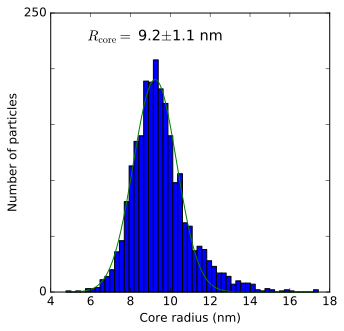

  mean, S.D.:  9.03498546581 1.03332797554
  Gaussian fit: mu, sigma: 		 [ 8.87376885  0.82069095]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02291854  0.02291872]


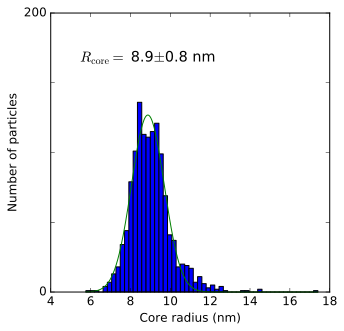

  mean, S.D.:  8.49611306757 1.23024441618
  Gaussian fit: mu, sigma: 		 [ 8.38774684  1.23884857]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05033314  0.05148354]


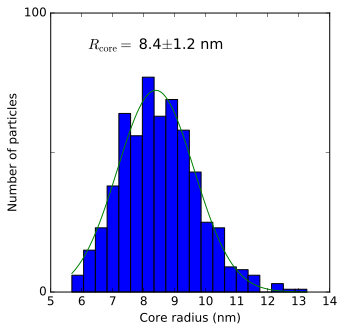

  mean, S.D.:  9.2211971908 1.33899818296
  Gaussian fit: mu, sigma: 		 [ 9.00765483  1.03060425]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02094189  0.0209419 ]


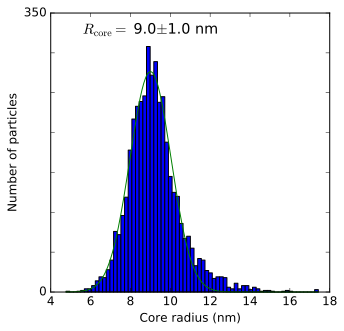

In [40]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData0, tempData1, tempData2, tempData]:
    radii = np.sqrt(data[:,1]/pi)
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$R_{\mathrm{core}}=$'+' {0:.1f}$\pm${1:.1f} nm'.format(popt[1], popt[2]))   
    ymax = ceil(50*(amp + 15))/50
    xlim = pylab.xlim()
    ylim = pylab.ylim([0,ymax])
    yticks, yticklabels = pylab.yticks()
    yticks = np.arange(0,ymax+50, 50)
    yticklabels = np.empty_like(yticks).astype(str)
    for i in range(len(yticks)): 
        if ( (i == 0)| (i == len(yticks)-1) ): yticklabels[i] = str(int(yticks[i]))
        else: yticklabels[i] = ''
    yticks, yticklabels = pylab.yticks(yticks, yticklabels)
    ylim = pylab.ylim()
    pylab.text(popt[1], 0.5*(amp+ylim[-1]), figText, verticalalignment='center', horizontalalignment='center', size='large')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = "AW5-" + ["a, L1-Thn", "b, L2-Med", "c, L3-Thk", "a-c, L-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    # pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

### Linear PNIPAM cores (AW5), from ImageJ particle analysis, using mean of major/minor axis

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
Analyzing data ...
  mean, S.D.:  9.55207660228 1.46349505045
  Gaussian fit: mu, sigma: 		 [ 9.25721634  1.09071692]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02612803  0.02612805]


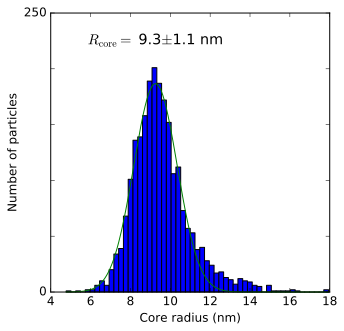

  mean, S.D.:  9.05515419636 1.04703850477
  Gaussian fit: mu, sigma: 		 [ 8.88885096  0.81909149]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02480927  0.02480943]


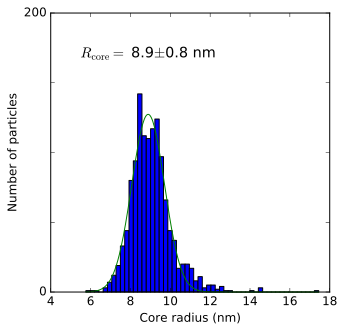

  mean, S.D.:  8.51818367347 1.23835249594
  Gaussian fit: mu, sigma: 		 [ 8.38482607  1.24152097]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.04331768  0.04436926]


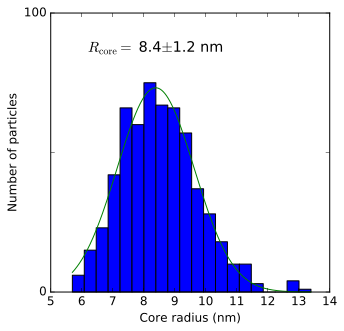

  mean, S.D.:  9.2528414265 1.36879323857
  Gaussian fit: mu, sigma: 		 [ 9.02044536  1.03141882]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.0199317   0.01993172]


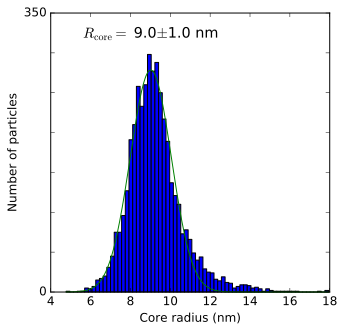

In [41]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData0, tempData1, tempData2, tempData]:
    radii = 0.25*(data[:,4] + data[:,5])
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$R_{\mathrm{core}}=$'+' {0:.1f}$\pm${1:.1f} nm'.format(popt[1], popt[2]))   
    ymax = ceil(50*(amp + 10))/50
    xlim = pylab.xlim()
    ylim = pylab.ylim([0,ymax])
    yticks, yticklabels = pylab.yticks()
    yticks = np.arange(0,ymax+50, 50)
    yticklabels = np.empty_like(yticks).astype(str)
    for i in range(len(yticks)): 
        if ( (i == 0)| (i == len(yticks)-1) ): yticklabels[i] = str(int(yticks[i]))
        else: yticklabels[i] = ''
    yticks, yticklabels = pylab.yticks(yticks, yticklabels)
    ylim = pylab.ylim()
    pylab.text(popt[1], 0.5*(amp+ylim[-1]), figText, verticalalignment='center', horizontalalignment='center', size='large')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = "AW5-" + ["a, L1-Thn", "b, L2-Med", "c, L3-Thk", "a-c, L-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    # pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

### Linear PNIPAM cores (AW5), from ImageJ particle analysis, using minor axis

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
Analyzing data ...
  mean, S.D.:  8.84650351185 1.24196575896
  Gaussian fit: mu, sigma: 		 [ 8.72275006  1.07270829]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.02683957  0.02683958]


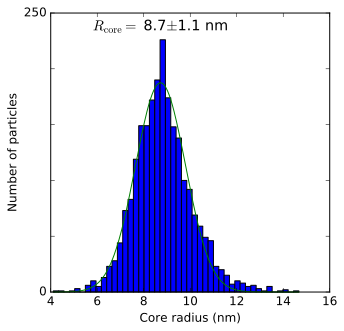

  mean, S.D.:  8.54091528108 0.925945653628
  Gaussian fit: mu, sigma: 		 [ 8.45052054  0.82187084]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.0172553   0.01725716]


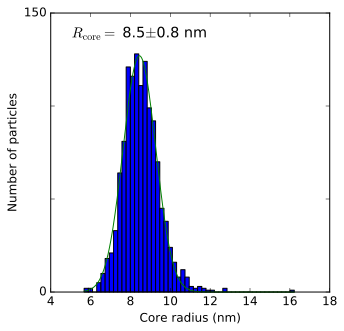

  mean, S.D.:  7.99221513605 1.17520358385
  Gaussian fit: mu, sigma: 		 [ 7.94840808  1.23407916]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05618519  0.05661872]


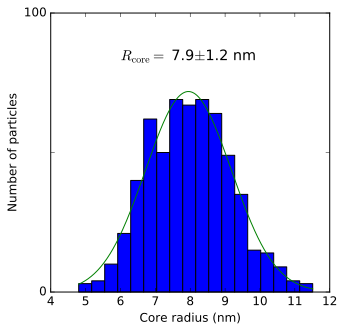

  mean, S.D.:  8.63137163962 1.1815870991
  Gaussian fit: mu, sigma: 		 [ 8.54201022  1.01072992]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.01960865  0.01960865]


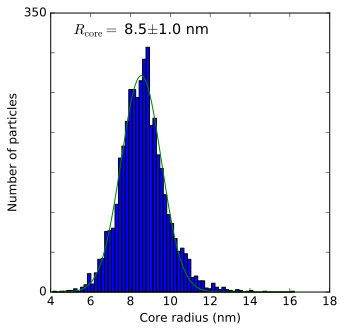

In [42]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData0, tempData1, tempData2, tempData]:
    radii = 0.5*(data[:,5])
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$R_{\mathrm{core}}=$'+' {0:.1f}$\pm${1:.1f} nm'.format(popt[1], popt[2]))   
    ymax = ceil(50*(amp + 10))/50
    xlim = pylab.xlim()
    ylim = pylab.ylim([0,ymax])
    yticks, yticklabels = pylab.yticks()
    yticks = np.arange(0,ymax+50, 50)
    yticklabels = np.empty_like(yticks).astype(str)
    for i in range(len(yticks)): 
        if ( (i == 0)| (i == len(yticks)-1) ): yticklabels[i] = str(int(yticks[i]))
        else: yticklabels[i] = ''
    yticks, yticklabels = pylab.yticks(yticks, yticklabels)
    ylim = pylab.ylim()
    pylab.text(popt[1], 0.5*(amp+ylim[-1]), figText, verticalalignment='center', horizontalalignment='center', size='large')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = "AW5-" + ["a, L1-Thn", "b, L2-Med", "c, L3-Thk", "a-c, L-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    #pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

### Formatted histogram, from minor axis data

Importing data in folder data_20170117 ...
  nanoparticle statistics, a linear-short, 3 images, AW5-273_0015+0015+0017.csv
  nanoparticle statistics, b linear-med, 5 images, AW5-TH089_0015+0016+0017+0018+0019.csv
  nanoparticle statistics, c linear-long, 3 images, AW5-DS02_b2_0017+0021+0022.csv
Analyzing data ...
  mean, S.D.:  8.63137163962 1.1815870991
  Gaussian fit: mu, sigma: 		 [ 8.54201022  1.01072992]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.01960865  0.01960865]
Exported to:
 graphics/20170320_core-radius-histogram_L1-3_44.5mm.svg
Exported to:
 graphics/20170320_core-radius-histogram_L1-3_63.5mm.svg
Exported to:
 graphics/20170320_core-radius-histogram_L1-3_85mm.svg


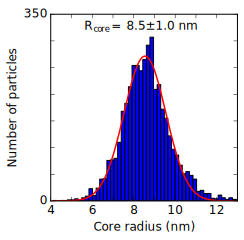

In [31]:
exportFlag = True
pylab.cla()


folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData0 = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)
tempData1 = np.genfromtxt(folderName+'/'+fileNames[1], delimiter=',', skip_header=1)
tempData2 = np.genfromtxt(folderName+'/'+fileNames[2], delimiter=',', skip_header=1)
tempData = np.concatenate((tempData0, tempData1, tempData2), axis=0)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

data = tempData
radii = 0.5*(data[:,5])
avg, stdev = np.mean(radii), np.std(radii)
print("  "+"mean, S.D.: ", avg, stdev)

hist, bin_edges = np.histogram( radii, bins='auto' )
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
pylab.hist( radii, bins='auto')
amp = max(hist)

init  = [amp, avg, stdev]
xdata, ydata = np.array(bin_centers), np.array(hist)
popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
yfitdata = []
for x in xfitdata:
    yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
yfitdata = np.array(yfitdata)
pylab.plot(xfitdata, yfitdata, color='red', linewidth=1.5)

## Text and sizing
pylab.xlabel("Core radius (nm)")
pylab.ylabel("Number of particles")

xlim = pylab.xlim([4, 13])
xticks = np.arange(4, 14, 1)
xticklabels = xticks.astype(int).astype(str)
for i in range(1, len(xticks), 2): xticklabels[i] = ''
xticks, xticklabels = pylab.xticks(xticks, xticklabels)
xlim = pylab.xlim()

ymax = ceil(50*(amp + 10))/50
ylim = pylab.ylim([0,ymax])
yticks = np.arange(0,ymax+50, 50)
yticklabels = (yticks.astype(int)).astype(str)
for i in range(1, len(yticks)-1): yticklabels[i] = ''
yticks, yticklabels = pylab.yticks(yticks, yticklabels)
ylim = pylab.ylim()

aspect_ratio = 1
aspect = ( (xlim[1]-xlim[0])/(ylim[1]-ylim[0]) )/aspect_ratio
pylab.axes().set_aspect(aspect, adjustable='box')

figText = ('\n$R_{\mathrm{core}}=$'+' {0:.1f}±{1:.1f} nm'.format(popt[1], popt[2]))   
pylab.figtext(0.5, 0.5*(amp+ylim[-1])/(1.07*(ylim[1]-ylim[0])), figText, verticalalignment='center', horizontalalignment='center')

## Save and display
if (exportFlag):
    fig = pylab.gcf()
    axis = pylab.gca()
    wmmList = [44.5, 63.5, 85]
    matplotlib.rcParams['svg.fonttype'] = 'none'
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    identifier = '_core-radius-histogram_L1-3'
    folder = 'graphics/'
    for wmm in wmmList:
        fig.set_size_inches(wmm/25.4, wmm/25.4)
        fontSize = min([int(ceil(wmm/5.7)), 12])
        matplotlib.rcParams.update({'font.size': fontSize})
        fig.texts[-1].set_fontsize(fontSize)
        sizeName = '_' + str(wmm) + 'mm'
        filename = folder + timestamp + identifier + sizeName + exportFormat
        pylab.savefig(filename, transparent=True); print("Exported to:\n", filename)

pylab.show()

if (exportFlag): 
    matplotlib.rcParams['svg.fonttype'] = 'path'
    matplotlib.rcParams['font.size'] = 12


## Cross-linked cores, from previous analysis (M. Karg)

### First plot

Import and organize data
Importing data in folder data_20170117 ...
  nanoparticle statistics, d x-linked all, core-diameter-distribution.csv
Analyzing data ...
  mean, S.D.:  6.70622390671 0.484409990774
  Gaussian fit: mu, sigma: 		 [ 6.76726048  0.54016943]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05169725  0.05455907]


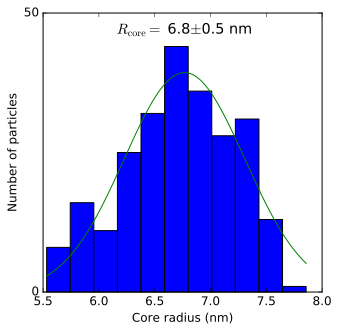

In [45]:
print("Import and organize data")
print("========================")
folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' not in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

pylab.cla()
iter = 0
for data in [tempData]:
    radii = 0.5*(data[:])
    avg, stdev = np.mean(radii), np.std(radii)
    print("  "+"mean, S.D.: ", avg, stdev)
    
    hist, bin_edges = np.histogram( radii, bins='auto' )
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    pylab.hist( radii, bins='auto' )
    amp = max(hist)
    
    init  = [amp, avg, stdev]
    xdata, ydata = np.array(bin_centers), np.array(hist)
    popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
    print("  "+"Gaussian fit: mu, sigma: \t\t", np.abs(popt[1:]))
    print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
    xfitdata = np.linspace(bin_edges[0], bin_edges[-1], 300)
    yfitdata = []
    for x in xfitdata:
        yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
    yfitdata = np.array(yfitdata)
    pylab.plot(xfitdata, yfitdata)
    
    ## Specific format options
    pylab.xlabel("Core radius (nm)")
    pylab.ylabel("Number of particles")
    figText = ('$R_{\mathrm{core}}=$'+' {0:.1f}$\pm${1:.1f} nm'.format(popt[1], abs(popt[2])))   
    ymax = ceil(50*(amp + 5))/50
    xlim = pylab.xlim()
    ylim = pylab.ylim([0,ymax])
    yticks, yticklabels = pylab.yticks()
    yticks = np.arange(0,ymax+50, 50)
    yticklabels = np.empty_like(yticks).astype(str)
    for i in range(len(yticks)): 
        if ( (i == 0)| (i == len(yticks)-1) ): yticklabels[i] = str(int(yticks[i]))
        else: yticklabels[i] = ''
    yticks, yticklabels = pylab.yticks(yticks, yticklabels)
    ylim = pylab.ylim()
    pylab.text(popt[1], 0.5*(amp+ylim[-1]), figText, verticalalignment='center', horizontalalignment='center', size='large')
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    sampleName = ["d-e, X-combined"][iter]
    iter = iter+1
    filename = "graphics/" + timestamp + "_core-size-histogram_" + sampleName + exportFormat
    # pylab.savefig(filename); print("  "+"Exported to:\n  ", filename)
    pylab.show()

### Formatted histogram

Importing data in folder data_20170117 ...
  nanoparticle statistics, d x-linked all, core-diameter-distribution.csv
Analyzing data ...
  mean, S.D.:  6.70622390671 0.484409990774
  Gaussian fit: mu, sigma: 		 [ 6.76726048 -0.54016943]
  Gaussian fit errors: d-mu, d-sigma: 	 [ 0.05169725  0.05455907]
Exported to:
 graphics/20170320_core-radius-histogram_X1-3_44.5mm.svg
Exported to:
 graphics/20170320_core-radius-histogram_X1-3_63.5mm.svg
Exported to:
 graphics/20170320_core-radius-histogram_X1-3_85mm.svg


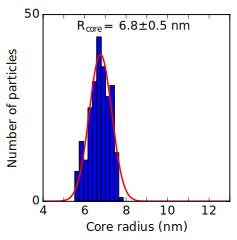

In [30]:
exportFlag = True
pylab.cla()


folderName = 'data_20170117'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    if 'linear' not in file:
        print("  "+file)
        fileNames.append(file)

print("Analyzing data ...")
tempData = np.genfromtxt(folderName+'/'+fileNames[0], delimiter=',', skip_header=1)

def fitfunc (x, A, x0, xsigma): 
    x = x.real
    return A*np.exp(-0.5*((x-x0)/xsigma)**2)

data = tempData
radii = 0.5*(data[:])
avg, stdev = np.mean(radii), np.std(radii)
print("  "+"mean, S.D.: ", avg, stdev)

hist, bin_edges = np.histogram( radii, bins='auto' )
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
pylab.hist( radii, bins='auto')
amp = max(hist)

init  = [amp, avg, stdev]
xdata, ydata = np.array(bin_centers), np.array(hist)
popt, pcov = sp.optimize.curve_fit(fitfunc, xdata, ydata)
print("  "+"Gaussian fit: mu, sigma: \t\t", popt[1:])
print("  "+"Gaussian fit errors: d-mu, d-sigma: \t", (np.sqrt(np.diag(pcov)))[1:])
xfitdata = np.linspace(4, 13, 300)
yfitdata = []
for x in xfitdata:
    yfitdata.append(fitfunc(x, popt[0], popt[1], popt[2]))
yfitdata = np.array(yfitdata)
pylab.plot(xfitdata, yfitdata, color='red', linewidth=1.5)

## Text and sizing
pylab.xlabel("Core radius (nm)")
pylab.ylabel("Number of particles")

xlim = pylab.xlim([4, 13])
xticks = np.arange(4, 14, 1)
xticklabels = xticks.astype(int).astype(str)
for i in range(1, len(xticks), 2): xticklabels[i] = ''
xticks, xticklabels = pylab.xticks(xticks, xticklabels)
xlim = pylab.xlim()

ymax = ceil(50*(amp + 5))/50
ylim = pylab.ylim([0,ymax])
yticks = np.arange(0,ymax+50, 50)
yticklabels = (yticks.astype(int)).astype(str)
for i in range(1, len(yticks)-1): yticklabels[i] = ''
yticks, yticklabels = pylab.yticks(yticks, yticklabels)
ylim = pylab.ylim()

aspect_ratio = 1
aspect = ( (xlim[1]-xlim[0])/(ylim[1]-ylim[0]) )/aspect_ratio
pylab.axes().set_aspect(aspect, adjustable='box')

figText = ('\n$R_{\mathrm{core}}=$'+' {0:.1f}±{1:.1f} nm'.format(popt[1], abs(popt[2])))
pylab.figtext(0.5, 0.5*(amp+ylim[-1])/(1.07*(ylim[1]-ylim[0])), figText, verticalalignment='center', horizontalalignment='center')

## Save and display
if (exportFlag):
    fig = pylab.gcf()
    axis = pylab.gca()
    wmmList = [44.5, 63.5, 85]
    matplotlib.rcParams['svg.fonttype'] = 'none'
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    identifier = '_core-radius-histogram_X1-3'
    folder = 'graphics/'
    for wmm in wmmList:
        fig.set_size_inches(wmm/25.4, wmm/25.4)
        fontSize = min([int(ceil(wmm/5.7)), 12])
        matplotlib.rcParams.update({'font.size': fontSize})
        fig.texts[-1].set_fontsize(fontSize)
        sizeName = '_' + str(wmm) + 'mm'
        filename = folder + timestamp + identifier + sizeName + exportFormat
        pylab.savefig(filename, transparent=True); print("Exported to:\n", filename)

pylab.show()

if (exportFlag): 
    matplotlib.rcParams['svg.fonttype'] = 'path'
    matplotlib.rcParams['font.size'] = 12